residuals plot - how well the model matches the DESI spectrum. within +/- 1sig = within expected noise. systematic residuals = modelling errors

In [108]:
import sys
sys.path.append('/Users/sampadaadhikari/Documents/uni/year3/intern2/desi_retriever/py')

from desi_retriever.loa import get_specs, get_rvspec_models
from desi_retriever.plotter import plot as desi_plot


In [ ]:
#gaia DR3 source IDs
gaia_id1 = 3651168951214106752 #star 1
gaia_id2 = 3651168951213404672 #star 2

#obtaining DESI spectra and radial velocity fits
spec1 = get_specs(gaia_edr3_source_id=gaia_id1, ivar=True, fibermap=True)
spec2 = get_specs(gaia_edr3_source_id=gaia_id2, ivar=True, fibermap=True)

rvspec_models1 = get_rvspec_models(gaia_edr3_source_id=gaia_id1)
rvspec_models2 = get_rvspec_models(gaia_edr3_source_id=gaia_id2)


/var/folders/67/31pqcccd7nzgsgz8p_4_14z80000gn/T/ipykernel_63876/3363971634.py:35: RuntimeWarning: divide by zero encountered in divide
  sigma1 = convolve(np.sqrt(1. / ivar1) / 2.5, kernel, boundary='extend')
/var/folders/67/31pqcccd7nzgsgz8p_4_14z80000gn/T/ipykernel_63876/3363971634.py:36: RuntimeWarning: divide by zero encountered in divide
  sigma2 = convolve(np.sqrt(1. / ivar2) / 2.5, kernel, boundary='extend')


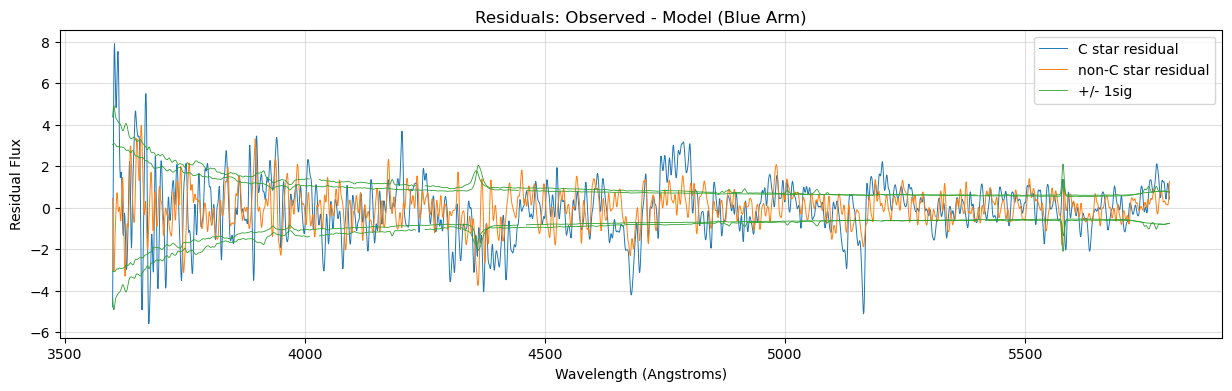

/var/folders/67/31pqcccd7nzgsgz8p_4_14z80000gn/T/ipykernel_63876/3363971634.py:78: RuntimeWarning: divide by zero encountered in divide
  sigma1 = convolve(np.sqrt(1. / ivar1) / 2.5, kernel, boundary='extend')
/var/folders/67/31pqcccd7nzgsgz8p_4_14z80000gn/T/ipykernel_63876/3363971634.py:79: RuntimeWarning: divide by zero encountered in divide
  sigma2 = convolve(np.sqrt(1. / ivar2) / 2.5, kernel, boundary='extend')


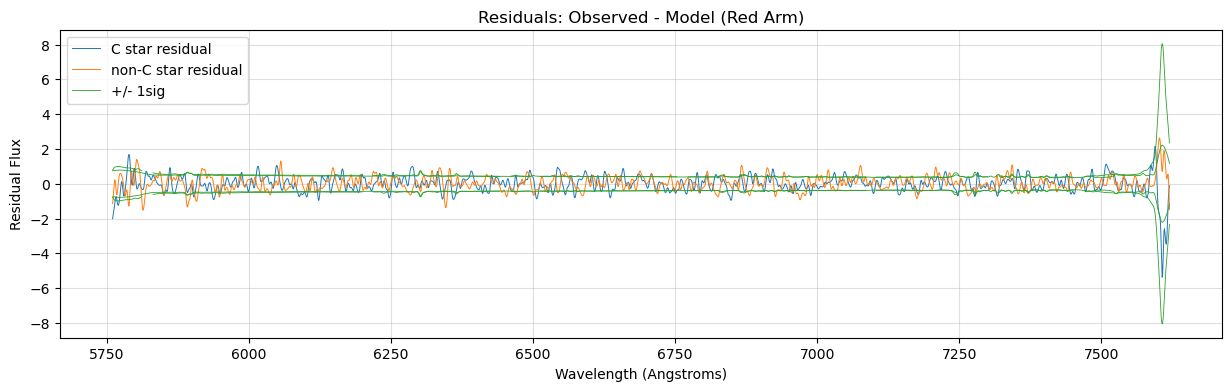

/var/folders/67/31pqcccd7nzgsgz8p_4_14z80000gn/T/ipykernel_63876/3363971634.py:121: RuntimeWarning: divide by zero encountered in divide
  sigma1 = convolve(np.sqrt(1. / ivar1) / 2.5, kernel, boundary='extend')
/var/folders/67/31pqcccd7nzgsgz8p_4_14z80000gn/T/ipykernel_63876/3363971634.py:122: RuntimeWarning: divide by zero encountered in divide
  sigma2 = convolve(np.sqrt(1. / ivar2) / 2.5, kernel, boundary='extend')


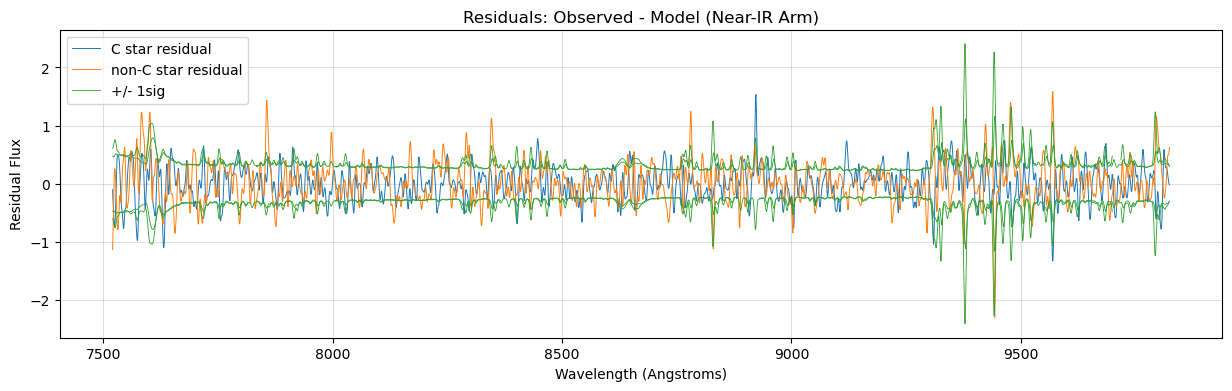

In [110]:
#for plotting 
import matplotlib.pyplot as plt
#smoothing the spectra, each point replaced with weighted av of neighbours 
#closer points weighted more, follows Gaussian shape
#needed to smooth residuals to mimic how instrument would blur 'perfect' spectra
from astropy.convolution import convolve, Gaussian1DKernel
#numerical operations 
import numpy as np

#1D gaussian with standard deviation of 2.5 pixels 
kernel = Gaussian1DKernel(2.5)
#wavelength array for blue arm retrieved from model 
wavelength = rvspec_models1[0]['b_wavelength']

#plotting the residuals of the blue arm spectra 
plt.figure(figsize=(15, 4))
plt.plot(wavelength,
         #spec1[0]['b_flux'] = observed flux of star 1 in blue arm
         #rvspec_models1[0]['b_model'] = model flux of star 1 in blue arm
         #difference gives residuals - difference smoothed using gaussian kernel
         convolve(spec1[0]['b_flux'] - rvspec_models1[0]['b_model'], kernel, boundary='extend'),
         label='C star residual', lw=0.7)
#one line for C star and one for non-C star
plt.plot(wavelength,
         convolve(spec2[0]['b_flux'] - rvspec_models2[0]['b_model'], kernel, boundary='extend'),
         label='non-C star residual', lw=0.7)

#for the +/- 1sigma curves
#ivar = inverse variance, used to calculate uncertainty in flux
#sqrt(1/ivar) gives standard deviation of flux 
#scaled by 2.5 - maybe matching visually to the residuals? 
##convolve with gaussian kernel to smooth the uncertainty curves 
ivar1 = spec1[0]['b_ivar']
ivar2 = spec2[0]['b_ivar']
sigma1 = convolve(np.sqrt(1. / ivar1) / 2.5, kernel, boundary='extend')
sigma2 = convolve(np.sqrt(1. / ivar2) / 2.5, kernel, boundary='extend')

#plotting the uncertainty curves around 0
#upper/lower bounds of expected scatter in residuals  
plt.plot(wavelength, sigma1, color='C2', lw=0.6, label='+/- 1sig')
plt.plot(wavelength, sigma2, color='C2', lw=0.6)
plt.plot(wavelength, -sigma1, color='C2', lw=0.6)
plt.plot(wavelength, -sigma2, color='C2', lw=0.6)

#labels and formatting 
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Residual Flux')
plt.title('Residuals: Observed - Model (Blue Arm)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()



#wavelength array for red arm retrieved from model 
wavelength = rvspec_models1[0]['r_wavelength']

#plotting the residuals of the red arm spectra 
plt.figure(figsize=(15, 4))
plt.plot(wavelength,
         #spec1[0]['r_flux'] = observed flux of star 1 in red arm
         #rvspec_models1[0]['r_model'] = model flux of star 1 in red arm
         #difference gives residuals - difference smoothed using gaussian kernel
         convolve(spec1[0]['r_flux'] - rvspec_models1[0]['r_model'], kernel, boundary='extend'),
         label='C star residual', lw=0.7)
#one line for C star and one for non-C star
plt.plot(wavelength,
         convolve(spec2[0]['r_flux'] - rvspec_models2[0]['r_model'], kernel, boundary='extend'),
         label='non-C star residual', lw=0.7)

#for the +/- 1sigma curves
#ivar = inverse variance, used to calculate uncertainty in flux
#sqrt(1/ivar) gives standard deviation of flux
#scaled by 2.5 - maybe matching visually to the residuals?
##convolve with gaussian kernel to smooth the uncertainty curves
ivar1 = spec1[0]['r_ivar']
ivar2 = spec2[0]['r_ivar']
sigma1 = convolve(np.sqrt(1. / ivar1) / 2.5, kernel, boundary='extend')
sigma2 = convolve(np.sqrt(1. / ivar2) / 2.5, kernel, boundary='extend')

#plotting the uncertainty curves around 0
#upper/lower bounds of expected scatter in residuals  
plt.plot(wavelength, sigma1, color='C2', lw=0.6, label='+/- 1sig')
plt.plot(wavelength, sigma2, color='C2', lw=0.6)
plt.plot(wavelength, -sigma1, color='C2', lw=0.6)
plt.plot(wavelength, -sigma2, color='C2', lw=0.6)

#labels and formatting 
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Residual Flux')
plt.title('Residuals: Observed - Model (Red Arm)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()



#wavelength array for near-ir arm retrieved from model 
wavelength = rvspec_models1[0]['z_wavelength']

#plotting the residuals of the near-ir arm spectra 
plt.figure(figsize=(15, 4))
plt.plot(wavelength,
         #spec1[0]['z_flux'] = observed flux of star 1 in near-ir arm
         #rvspec_models1[0]['z_model'] = model flux of star 1 in near-ir arm
         #difference gives residuals - difference smoothed using gaussian kernel
         convolve(spec1[0]['z_flux'] - rvspec_models1[0]['z_model'], kernel, boundary='extend'),
         label='C star residual', lw=0.7)
#one line for C star and one for non-C star
plt.plot(wavelength,
         convolve(spec2[0]['z_flux'] - rvspec_models2[0]['z_model'], kernel, boundary='extend'),
         label='non-C star residual', lw=0.7)

#for the +/- 1sigma curves
#ivar = inverse variance, used to calculate uncertainty in flux
#sqrt(1/ivar) gives standard deviation of flux
#scaled by 2.5 - maybe matching visually to the residuals?
##convolve with gaussian kernel to smooth the uncertainty curves
ivar1 = spec1[0]['z_ivar']
ivar2 = spec2[0]['z_ivar']
sigma1 = convolve(np.sqrt(1. / ivar1) / 2.5, kernel, boundary='extend')
sigma2 = convolve(np.sqrt(1. / ivar2) / 2.5, kernel, boundary='extend')

#plotting the uncertainty curves around 0
#upper/lower bounds of expected scatter in residuals  
plt.plot(wavelength, sigma1, color='C2', lw=0.6, label='+/- 1sig')
plt.plot(wavelength, sigma2, color='C2', lw=0.6)
plt.plot(wavelength, -sigma1, color='C2', lw=0.6)
plt.plot(wavelength, -sigma2, color='C2', lw=0.6)

#labels and formatting 
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Residual Flux')
plt.title('Residuals: Observed - Model (Near-IR Arm)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()



aperture correction calculations - estimate how much flux was captured by fibre vs lost - to compare modelled/observed fluxes 

In [111]:
#skycoord - define celestial coordinates for the fibres and Gaia sources 
from astropy.coordinates import SkyCoord
#units - specifying angles - degrees/arcseconds etc. 
import astropy.units as u
#fits - read FWHM from FITS tables 
from astropy.io import fits
#moffatpsf - models fibre transfer function using Moffat profile - realistic seeing profiles 
from photutils.psf import MoffatPSF

#define coordinates for the fibres and Gaia sources
#using the coordinates from the provided spec1 and spec2 data
#assuming spec1 and spec2 are lists of FITS HDUList objects with fibermap

#fibre coordinates from the fibermap of each spectrum - the actual ra/dec positions where fibres are places on sky 
#calculate how off centre the stars were from fibre centres 
fibre_coords = SkyCoord(ra=[spec1[0]['fibermap'][['MEAN_FIBER_RA']][0], spec2[0]['fibermap'][['MEAN_FIBER_RA']][0]], 
                        dec=[spec1[0]['fibermap'][['MEAN_FIBER_DEC']][0], spec2[0]['fibermap'][['MEAN_FIBER_DEC']][0]], frame='icrs', unit='deg')
#actual coordinates of the Gaia sources 
#true celestial coordinates of the stars from Gaia DR3 - reference point - fibre should be centred on these
#offset from this = flux loss in psf 
gaia_coords = SkyCoord(ra=[223.774987, 223.775068]*u.deg,
                        dec=[0.377612, 0.377313]*u.deg,
                        frame='icrs')
#sdss fibre centre coordinates 
#only one fibre placed on both stars, so using the same centre for both 
sdss_centre = SkyCoord(223.775055151706*u.deg, 0.377515593391544*u.deg, frame='icrs')

In [112]:
#to load FWHM from SDSS plate file
with fits.open('plates-dr17.fits') as hdul:
    plates = hdul[1].data
    fwhm_sdss = plates[plates['PLATE'] == 309]['SEEING50'][0]

simulate how starlight spreads across fibre aperture - atmospheric seeing - then numerically integrate over PSF to find flux in aperture 

In [113]:
#resolution of spatial grid for PSF
delta = 0.05  # arcsec
#16 arcsec x 16 arcsec grid
#big enough to cover the fibre area
#x and y coordinates in arcseconds, centred on the fibre centre
#x and y range from -8 to 8 arcseconds, with a step of delta
#this creates a grid of points where the PSF will be evaluated 
x = np.arange(-8, 8, delta)
y = np.arange(-8, 8, delta)
X, Y = np.meshgrid(x, y)

#gaussian PSF function
#function that returns a 2D Gaussian PSF - centered at x_0, y_0 with given flux and FWHM
#sigma = std of gaussian, related to FWHM
#sigma = fwhm / (2 * (2 * np.log(2))**0.5) 
#func - returns normalised 2D gaussian flux den at each point (x, y) 
def gaussian(flux, fwhm, x_0=0., y_0=0.):
    """Returns a callable 2D Gaussian PSF"""
    sigma = fwhm / (2 * (2 * np.log(2))**0.5)
    def func(x, y):
        return flux * np.exp(-((x - x_0)**2 + (y - y_0)**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    return func


sete 2D grid to be centred on fibre, placing each star's psf to be at its offset from the fibre, integrate over fibre aperture to compute how much flux is actually captured. total captured flux depends on where star is located relative to fibre centre. if star perfectly centred in fibre - star psf centred at same place as fibre. 

In [114]:
#Z1 = gaussian(1.0, fwhm_sdss,
              #x_0=gaia_coords.ra.arcsec[0] - sdss_centre.ra.arcsec,
              #y_0=gaia_coords.dec.arcsec[0] - sdss_centre.dec.arcsec)(X, Y)
#Z2 = gaussian(1.0, fwhm_sdss,
              #x_0=gaia_coords.ra.arcsec[1] - sdss_centre.ra.arcsec,
              #y_0=gaia_coords.dec.arcsec[1] - sdss_centre.dec.arcsec)(X, Y)

#.ra.arcsec and .dec.arcsec not real properties in astropy.coordinates - shortcuts for unit conversion, don’t return valid values
#ra in degrees of longitude - have to account for cos(dec) to convert to arcsec
#so using spherical_offsets_to() to get the offsets in arcsec from the fibre centre to the gaia sources
#this gives the offsets in spherical coordinates, which can be converted to arcsec
#offsets[0] = ra offset, offsets[1] = dec offset 

#computing projected offsets in arcsec from fibre centre to Gaia sources 
offsets = gaia_coords.spherical_offsets_to(sdss_centre)
#ra offset x cos(dec) to convert to arcsec 
dx = offsets[0].to(u.arcsec).value
#dec offset y in arcsec
dy = offsets[1].to(u.arcsec).value

#psfs for each star, centered at offset from fibre centre
#using the Gaussian PSF function defined above, with the FWHM from SDSS
#Z1/Z2 = 2D arrays for flux den across the grid 
Z1 = gaussian(1.0, fwhm_sdss, x_0=dx[0], y_0=dy[0])(X, Y)
Z2 = gaussian(1.0, fwhm_sdss, x_0=dx[1], y_0=dy[1])(X, Y)

#Z3 is the ideal centred PSF (no offset) - to calculate maximum possible flux that could be captured by the fibre 
Z3 = gaussian(1.0, fwhm_sdss)(X, Y)

#to find how much flux is captured by the fibre for each star
#SDSS fibre radius: 3 arcsec diameter = 1.5 arcsec radius
aperture_radius_sdss = 3.0 / 2.0
#calculate total flux from each star inside SDSS fibre 
#np.sqrt(X**2 + Y**2) = gives radial distance from fibre centre at each point in the grid 
#only selecting points within the aperture radius to sum the flux
#delta**2 = converting from pixel units to arcsec^2
#np.sum(Z1) = total flux captured by the fibre for star 1
#np.sum(Z2) = total flux captured by the fibre for star 2
#np.sum(Z3) = total flux captured by the fibre if it was perfectly centred on the star - can be used to normalise the fluxes 
sdss_flux_captured_1 = np.sum(Z1[np.sqrt(X**2 + Y**2) <= aperture_radius_sdss]) * delta**2
sdss_flux_captured_2 = np.sum(Z2[np.sqrt(X**2 + Y**2) <= aperture_radius_sdss]) * delta**2
sdss_aperture_correction = np.sum(Z3[np.sqrt(X**2 + Y**2) <= aperture_radius_sdss]) * delta**2

print(f"SDSS aperture captured flux:")
print(f"Star 1: {sdss_flux_captured_1:.4f}")
print(f"Star 2: {sdss_flux_captured_2:.4f}")
print(f"Ideal (centred): {sdss_aperture_correction:.4f}")

SDSS aperture captured flux:
Star 1: 0.8456
Star 2: 0.7605
Ideal (centred): 0.8892


visualise the spatial distribution of stellar flux - via psf. shows fibre aperture as a circle. 

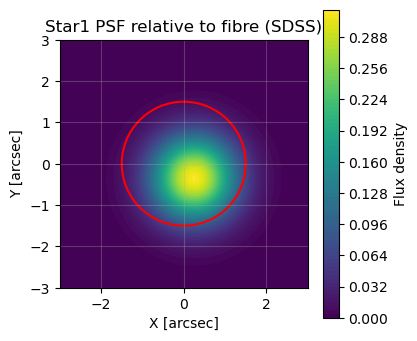

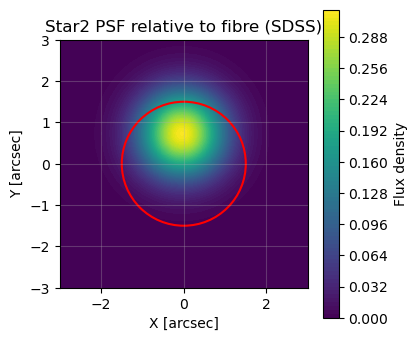

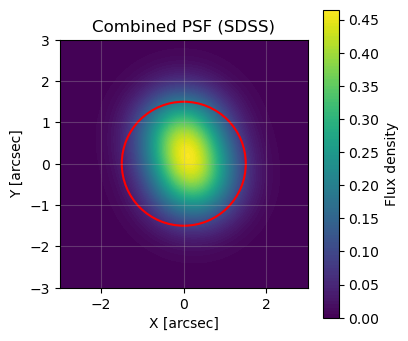

In [138]:
#z - 2D numpy array representing psf flux values across the grid
#title - title for the plot
#fibre_radius - radius of the fibre aperture in arcseconds - 1.5 for SDSS fibre 
def plot_psf_grid(Z, title, fibre_radius):
    'takes a 2D PSF array Z and plots it on a grid with a circle representing the fibre aperture' 
    plt.figure(figsize=(4, 4))
    #filled contour plot for psf flux density
    #X, Y are the meshgrid coordinates, Z is the flux density at each point
    #levels=100 - number of contour levels to draw
    #cmap='viridis' - colormap for the contours - represents intensity of flux 
    plt.contourf(X, Y, Z, levels=100, cmap='viridis')
    #defining red circle to represent the fibre aperture
    #plt.Circle - creates a circle patch at the origin (0, 0) with radius fibre_radius
    #color='r' - red colour for the circle
    #fill=False - no fill, just the outline of the circle
    #lw - line width of the circle outline
    circle = plt.Circle((0, 0), fibre_radius, color='r', fill=False, lw=1.5)
    #plt.gca().add_patch - adds the circle patch to the current axes
    plt.gca().add_patch(circle)
    #adding title and labels to the plot 
    plt.title(title)
    plt.xlabel('X [arcsec]')
    plt.ylabel('Y [arcsec]')
    plt.xlim(-3, 3)  # setting x limits to match the grid
    plt.ylim(-3, 3)  # setting y limits to match the grid
    #equating the aspect ratio of the plot to be equal
    #ensures that the x and y axes are scaled equally, so circles look like circles 
    plt.gca().set_aspect('equal')
    #plt.colorbar - adds a colorbar to the plot to indicate flux density values
    plt.colorbar(label='Flux density')
    #adding grid lines to the plot for better visibility 
    plt.grid(alpha=0.3)

#calling the function to plot the PSFs for each star and the ideal centred PSF 
plot_psf_grid(Z1, "Star1 PSF relative to fibre (SDSS)", 1.5)
plot_psf_grid(Z2, "Star2 PSF relative to fibre (SDSS)", 1.5)
plot_psf_grid(Z1+Z2, "Combined PSF (SDSS)", 1.5)


estimate how much flux from each star is captured by desi/boss fibre apertures 

In [132]:
#function to compute DESI aperture corrections and contamination matrix 
#models how much  light from each star in system is captured by each desi fibre in 2 diff exposures 
#given the coordinates of the stars and fibres, FWHM of the PSF for each exposure 
#accounts for aperture losses - how much light is lost due to the fibre not being perfectly centred on the star
#and contamination - how much light from one star is captured by the fibre of the other star 
#delta = pixel size for the simulation grid - smaller = better precision but slower 
#beta = Moffat profile parameter - controls the shape of the PSF, higher beta = sharper PSF 
def desi_aperture_corrections(gaia_coords, fibre_coords, fwhm1, fwhm2, delta=0.05, beta=3.5):
    """computing desi aperture corrections and contamination matrix between stars"""

    #create spatial grid - 16x16 arcsec simulation grid
    #x and y coordinates in arcseconds, centred on the fibre centre 
    x = np.arange(-8, 8, delta)
    y = np.arange(-8, 8, delta)
    X, Y = np.meshgrid(x, y)

    #convert FWHM (width of psf) to alpha parameter - width scale parameter of the Moffat profile 
    #photutils MoffatPSF uses alpha = FWHM / (2 * sqrt(2^(1/beta) - 1)) 
    def fwhm_to_alpha(fwhm):
        return fwhm / (2.0 * np.sqrt(2.0**(1.0 / beta) - 1.0))

    #convert FWHM to alpha for each exposure
    alpha1 = fwhm_to_alpha(fwhm1)
    alpha2 = fwhm_to_alpha(fwhm2)

    #desi fibre radius - 1.52 arcsec diameter = 0.76 arcsec radius 
    fibre_radius = 1.52 / 2.0

    #mix11 = flux from star 1 captured by fibre 1 
    #models psf of star 1 - evaluation on grid centred on fibre 1 
    #integrates flux inside the fibre radius  
    mix11_Z = MoffatPSF(flux=1.0, beta=beta, alpha=alpha1,
                  x_0=gaia_coords[0].ra.arcsec - fibre_coords[0].ra.arcsec,
                  y_0=gaia_coords[0].dec.arcsec - fibre_coords[0].dec.arcsec)(X, Y)
    mix11 = np.sum(mix11_Z[np.sqrt(X**2 + Y**2) <= fibre_radius]) * delta**2

    #mix12 = contamination from star 2 captured by fibre 1
    #models psf of star 2 - evaluation on grid centred on fibre 1 
    mix12_Z = MoffatPSF(flux=1.0, beta=beta, alpha=alpha1,
                  x_0=gaia_coords[1].ra.arcsec - fibre_coords[0].ra.arcsec,
                  y_0=gaia_coords[1].dec.arcsec - fibre_coords[0].dec.arcsec)(X, Y)
    mix12 = np.sum(mix12_Z[np.sqrt(X**2 + Y**2) <= fibre_radius]) * delta**2

    #ideal centred PSF for fibre 1
    #this is the PSF if the fibre was perfectly centred on star 1
    #calibration reference for the aperture correction
    Z_centered1 = MoffatPSF(flux=1.0, beta=beta, alpha=alpha1)(X, Y)
    desi_aperture_correction1 = np.sum(Z_centered1[np.sqrt(X**2 + Y**2) <= fibre_radius]) * delta**2

    #same steps for fibre 2
    mix22_Z = MoffatPSF(flux=1.0, beta=beta, alpha=alpha2,
                  x_0=gaia_coords[1].ra.arcsec - fibre_coords[1].ra.arcsec,
                  y_0=gaia_coords[1].dec.arcsec - fibre_coords[1].dec.arcsec)(X, Y)
    mix22 = np.sum(mix22_Z[np.sqrt(X**2 + Y**2) <= fibre_radius]) * delta**2

    mix21_Z = MoffatPSF(flux=1.0, beta=beta, alpha=alpha2,
                  x_0=gaia_coords[0].ra.arcsec - fibre_coords[1].ra.arcsec,
                  y_0=gaia_coords[0].dec.arcsec - fibre_coords[1].dec.arcsec)(X, Y)
    mix21 = np.sum(mix21_Z[np.sqrt(X**2 + Y**2) <= fibre_radius]) * delta**2

    Z_centered2 = MoffatPSF(flux=1.0, beta=beta, alpha=alpha2)(X, Y)
    desi_aperture_correction2 = np.sum(Z_centered2[np.sqrt(X**2 + Y**2) <= fibre_radius]) * delta**2

    #assembled contamination matrix - rows = fibres, columns = stars
    #diagonal elements are the flux captured by each fibre from its own star
    #off-diagonal elements are the contamination from the other star 
    contamination_matrix = np.array([[mix11, mix12],
                                     [mix21, mix22]])
    # Return contamination matrix, aperture corrections, and raw PSFs
    return contamination_matrix, desi_aperture_correction1, desi_aperture_correction2, {
        'Z11': mix11_Z,                            # last Z was star 1 in fibre 2
        'Z12': mix12_Z,                      # create these inside the function
        'Z21': mix21_Z,
        'Z22': mix22_Z,
        'Zcenter1': Z_centered1,
        'Zcenter2': Z_centered2,
        'X': X,
        'Y': Y
    }
cont_matrix, corr1, corr2, psfs = desi_aperture_corrections(
    gaia_coords=gaia_coords,
    fibre_coords=fibre_coords,
    #not shown here since it is redundant  
    #wav = 6250. #power = 0.2
    #fwhm1=1.162 * (wav/6250.)**-power 
    #fwhm2=1.755 * (wav/6250.)**-power
    fwhm1=1.162,  #DESI exposure 1
    fwhm2=1.755   #DESI exposure 2
)

print("Contamination matrix:\n", cont_matrix)

#normalise each row to the captured flux in that fibre
norm_cont = cont_matrix / cont_matrix.sum(axis=1)[:, None]
print("Normalised contamination matrix:\n", norm_cont)
#star1 = 75% own flux - 25% contamination from star 2
#star2 = 69% own flux - 31% contamination from star 1

print("Ideal aperture capture (exp 1):", corr1)
print("Ideal aperture capture (exp 2):", corr2)


Contamination matrix:
 [[0.54154282 0.18272477]
 [0.14210109 0.31537381]]
Normalised contamination matrix:
 [[0.74771096 0.25228904]
 [0.31062051 0.68937949]]
Ideal aperture capture (exp 1): 0.5483464340288022
Ideal aperture capture (exp 2): 0.3160365453667013


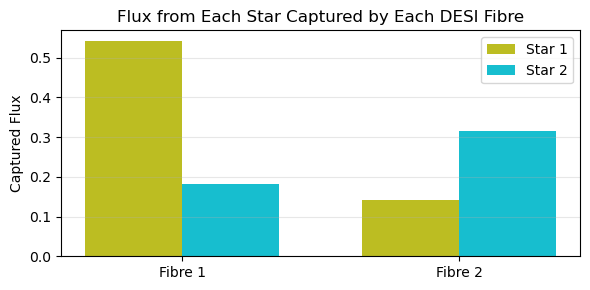

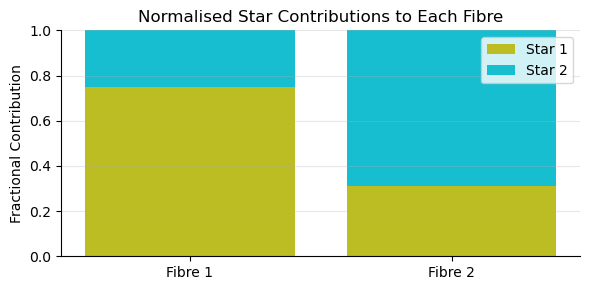

In [117]:
#labels for the x axis - for each fibre 
labels = ['Fibre 1', 'Fibre 2']
#amount of flux from each star captured by each fibre 
star1 = [cont_matrix[0, 0], cont_matrix[1, 0]]  #flux from star 1 to both fibres
star2 = [cont_matrix[0, 1], cont_matrix[1, 1]]  #flux from star 2 to both fibres

x = np.arange(len(labels))
width = 0.35  #width of the bars

#figure and axes for plotting the bar chartc
fig, ax = plt.subplots(figsize=(6, 3)) 
#two bars side by side for each fibre
#one for star 1 and one for star 2
#x - positions of the bars, width - width of the bars, label - legend label
#color - colour of the bars 
ax.bar(x - width/2, star1, width, label='Star 1', color='C8')
ax.bar(x + width/2, star2, width, label='Star 2', color='C9')

#labels and formatting 
ax.set_ylabel('Captured Flux')
ax.set_title('Flux from Each Star Captured by Each DESI Fibre', fontsize=12)
#x axis tick marks - for fibres 
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)
#preventing overlapping
plt.tight_layout()
plt.show()

#for the normalised contributions to each fibre 
fig, ax = plt.subplots(figsize=(6, 3))  
#fraction of flux in each fibre that comes from star 1 
ax.bar(['Fibre 1', 'Fibre 2'], norm_cont[:, 0], label='Star 1', color='C8')
#stacking the bar for star 2 on top of star 1 - from top of previous bar 
ax.bar(['Fibre 1', 'Fibre 2'], norm_cont[:, 1], 
       bottom=norm_cont[:, 0], label='Star 2', color='C9')

#labels and formatting
ax.set_ylabel('Fractional Contribution')
ax.set_title('Normalised Star Contributions to Each Fibre', fontsize=12)
ax.set_ylim(0, 1)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


plotting all relevant psfs - for visualisation 

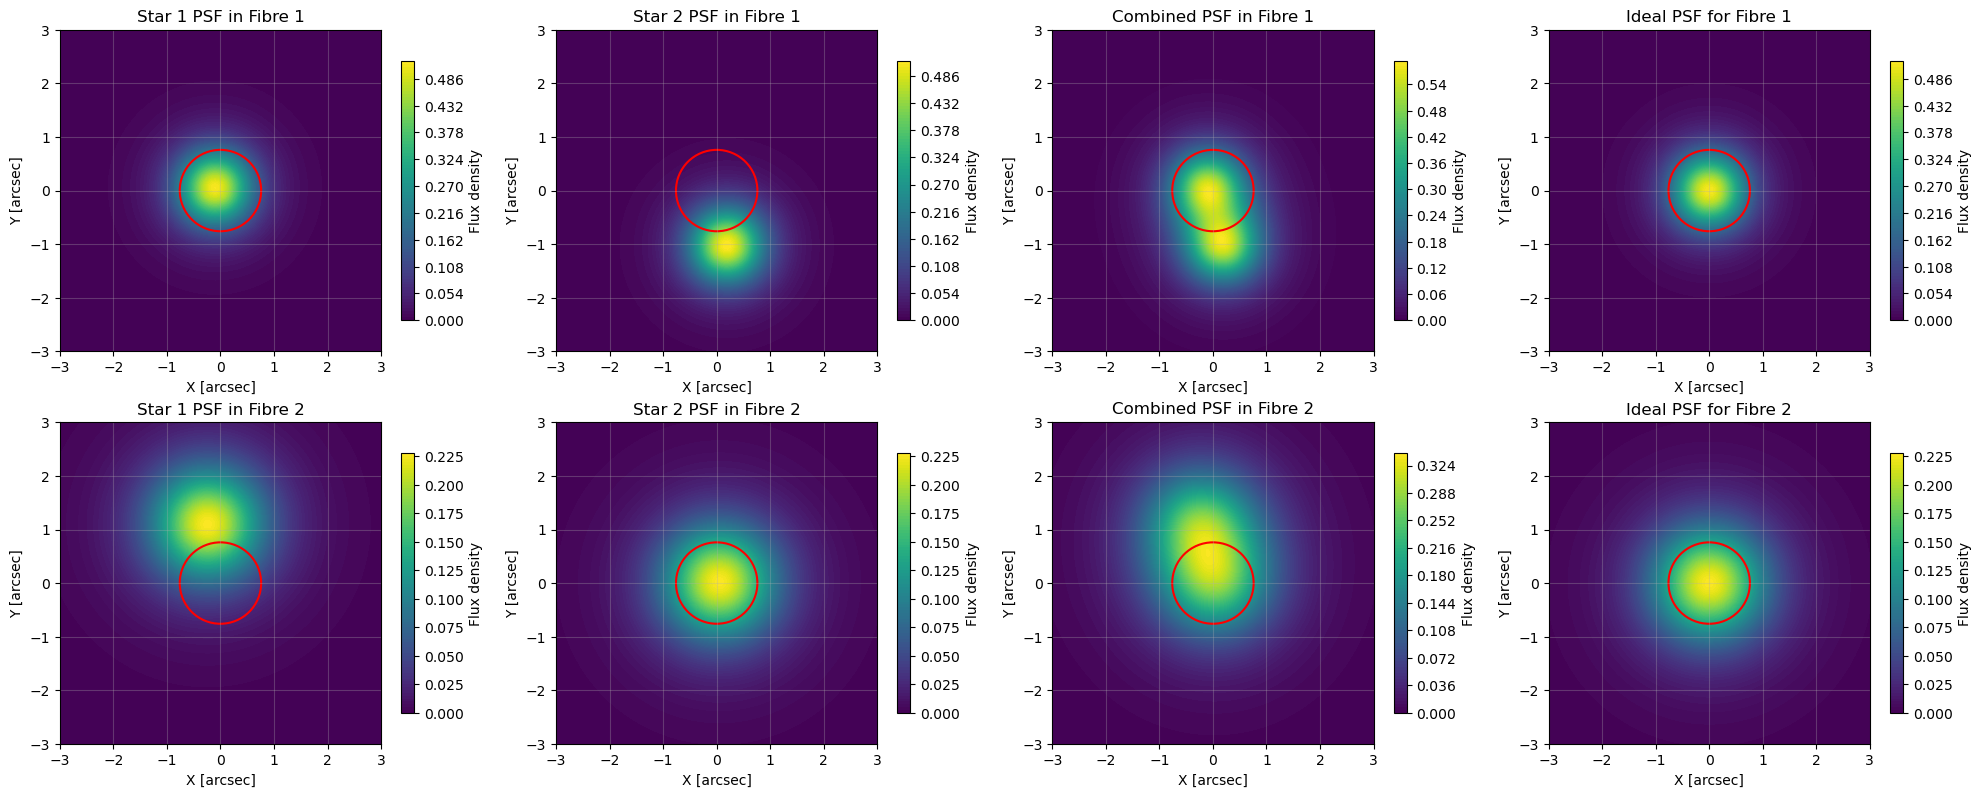

In [142]:
#defining a function to plot all DESI PSFs in a grid layout
#psfs - dictionary containing the PSF data for each star and fibre
#Z11, Z12, Z21, Z22 - PSFs for star 1 and star 2 in fibre 1 and fibre 2
#Zcenter1, Zcenter2 - ideal centred PSFs for fibre 1 and fibre 2
#X, Y - meshgrid coordinates for the PSF evaluation grid 
#fibre_radius - radius of the fibre aperture in arcseconds, 0.76 for DESI fibres 
def plot_desi_psf_grid(psfs, fibre_radius=0.76):
    """plotting all DESI PSFs (2 stars x 2 fibres + 2 ideal) and combined PSFs with star centres.""" 

    #2 rows and 4 columns for the subplots
    #first row: star 1 PSF, star 2 PSF, combined PSF, ideal PSF for fibre 1
    #second row: star 1 PSF, star 2 PSF, combined PSF, ideal PSF for fibre 2 
    fig, axs = plt.subplots(2, 4, figsize=(20, 8))
    #flattening the 2D array of axes to 1D for easier iteration 
    axs = axs.flatten()
    #setting the titles for each subplot 
    titles = [
        "Star 1 PSF in Fibre 1",
        "Star 2 PSF in Fibre 1",
        "Combined PSF in Fibre 1",
        "Ideal PSF for Fibre 1",
        "Star 1 PSF in Fibre 2",
        "Star 2 PSF in Fibre 2",
        "Combined PSF in Fibre 2",
        "Ideal PSF for Fibre 2"]
    
    #combining the PSFs for each fibre
    #Z_combined_1 = PSF for fibre 1 = sum of star 1 and star 2 PSFs in fibre 1
    #Z_combined_2 = PSF for fibre 2 = sum of star 1 and star 2 PSFs in fibre 2
    #these are used to show the total flux captured by each fibre from both stars 
    #visualise total signal vs contamination 
    Z_combined_1 = psfs['Z11'] + psfs['Z12']
    Z_combined_2 = psfs['Z21'] + psfs['Z22']

    #list of all PSFs to plot in the grid 
    #same order as the titles 
    Zs = [
        psfs['Z11'], psfs['Z12'], Z_combined_1, psfs['Zcenter1'],
        psfs['Z21'], psfs['Z22'], Z_combined_2, psfs['Zcenter2']]

    #plotting each PSF in the grid layout
    #using contourf to create filled contour plots for each PSF
    #adding a circle to represent the fibre aperture for each plot
    #setting the title, x and y limits, labels, aspect ratio, and grid for each subplot
    #using a loop to iterate over the axes, PSFs, and titles 
    for ax, Z, title in zip(axs, Zs, titles):
        #levels=100 - number of contour levels to draw - smooth gradient
        #cmap='viridis' - colormap for the contours - represents intensity of flux
        #X, Y are the meshgrid coordinates, Z is the flux density at each point 
        contour = ax.contourf(psfs['X'], psfs['Y'], Z, levels=100, cmap='viridis')
        #defining red circle to represent the fibre aperture 
        fibre_circle = plt.Circle((0, 0), fibre_radius, color='r', fill=False, lw=1.5)
        ax.add_patch(fibre_circle)
        ax.set_title(title)
        #setting the x and y limits to visualise the PSF properly 
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.set_xlabel("X [arcsec]")
        ax.set_ylabel("Y [arcsec]")
        #equating the aspect ratio of the plot to be equal
        #ensures that the x and y axes are scaled equally, so circles look like circles
        ax.set_aspect("equal")
        ax.grid(alpha=0.3)
        #adding a colorbar to each subplot to indicate flux density values
        fig.colorbar(contour, ax=ax, orientation='vertical', shrink=0.8, label='Flux density')
    #prevents overlapping of subplots 
    plt.tight_layout()
    plt.show()

#calling the function to plot the DESI PSFs in a grid layout 
plot_desi_psf_grid(psfs, fibre_radius=0.76)


In [126]:
#to load BOSS spectrum FITS file 
#opens boss spectrum file - observing metadata and fibre data 
sdss1 = fits.open('spec-102347-59731-27021598157843923.fits')

#boss_ra = (sdss1[2].data['FIBER_RA'][0] * u.deg).to(u.arcsec).value
#boss_dec = (sdss1[2].data['FIBER_DEC'][0] * u.deg).to(u.arcsec).value

#to extract fibre RA/Dec and convert to arcsecs 
#fibre_ra and fibre_dec are the coordinates of the fibre centre in arcseconds - where boss fibre placed
#same method as above for Gaia sources - converting to skycoord 
boss_centre = SkyCoord(sdss1[2].data['FIBER_RA'][0], sdss1[2].data['FIBER_DEC'][0], unit='deg', frame='icrs')

#to extract seeing FWHM - arcseconds 
#how wide psf is due to atmospheric seeing conditions 
boss_fwhm = sdss1[2].data['SEEING50'][0]
print(f"BOSS fibre FWHM: {boss_fwhm:.3f} arcsec")

#define fibre diameter and pixel grid
#BOSS fibre = 2 arcsec diameter
boss_fiber_radius = 1.0 
x = np.arange(-8, 8, delta)
y = np.arange(-8, 8, delta)
X, Y = np.meshgrid(x, y)

#create PSFs for both Gaia stars relative to fibre centre - using Gaussian profile
#2D gaussian PSF function with flux, FWHM, and offsets
#shifted so centred where star is located relative to fibre centre
#how much flux from each star is captured by the fibre - given offsets 
#Z1 = gaussian(flux=1.0, fwhm=boss_fwhm,
              #x_0=gaia_coords.ra.arcsec[0] - boss_ra,
              #y_0=gaia_coords.dec.arcsec[0] - boss_dec)(X, Y)
#Z2 = gaussian(flux=1.0, fwhm=boss_fwhm,
              #x_0=gaia_coords.ra.arcsec[1] - boss_ra,
              #y_0=gaia_coords.dec.arcsec[1] - boss_dec)(X, Y)

#using spherical_offsets_to() to get the offsets in arcsec from fibre centre to the gaia sources
offsets = gaia_coords.spherical_offsets_to(boss_centre)
#offsets[0] = ra offset, offsets[1] = dec offset
#convert offsets to arcseconds 
dx = offsets[0].to(u.arcsec).value
dy = offsets[1].to(u.arcsec).value

#computing the PSFs for each star relative to the fibre centre
#using the Gaussian PSF function defined above, with the FWHM from BOSS
#Z1/Z2 = 2D arrays for flux den across the grid 
Z1_boss = gaussian(flux=1.0, fwhm=boss_fwhm, x_0=dx[0], y_0=dy[0])(X, Y)
Z2_boss = gaussian(flux=1.0, fwhm=boss_fwhm, x_0=dx[1], y_0=dy[1])(X, Y)

#ideal centered PSF - reference PSF if fibre was perfectly centred on star 
#this is the maximum flux that could be captured by the fibre 
Z3_boss = gaussian(flux=1.0, fwhm=boss_fwhm)(X, Y)

#integrate flux within the fibre aperture
#r = radial distance from fibre centre at each point in the grid 
r = np.sqrt(X**2 + Y**2) 
#for each star, sum the flux within the fibre radius
#find region within 1 arcsec radius of the fibre centre. sum flux, multiply by area of each pixel for total flux captured 
#1 = fraction of star 1 light that entered the fibre
#2 = fraction of star 2 light that entered the fibre 
boss_flux_captured_1 = np.sum(Z1_boss[r <= boss_fiber_radius]) * delta**2
boss_flux_captured_2 = np.sum(Z2_boss[r <= boss_fiber_radius]) * delta**2
#ideal case where fibre and star are perfectly aligned 
boss_aperture_correction = np.sum(Z3_boss[r <= boss_fiber_radius]) * delta**2

print("BOSS fibre flux capture:")
print(f"Star 1: {boss_flux_captured_1:.4f}")
print(f"Star 2: {boss_flux_captured_2:.4f}")
print(f"Ideal centred: {boss_aperture_correction:.4f}")
 


BOSS fibre FWHM: 1.414 arcsec
BOSS fibre flux capture:
Star 1: 0.7483
Star 2: 0.2937
Ideal centred: 0.7487


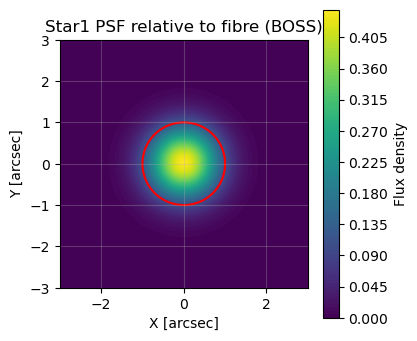

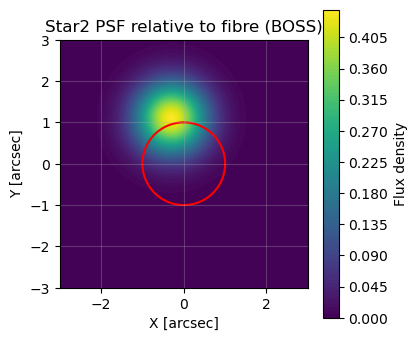

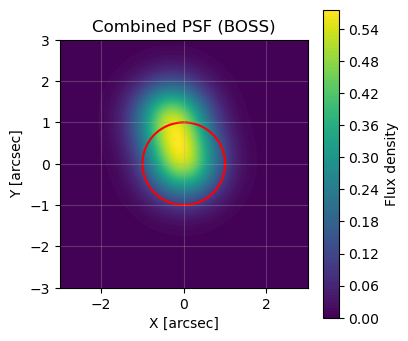

In [139]:
#calling the function to plot the PSFs for each star and the ideal centred PSF 
plot_psf_grid(Z1_boss, "Star1 PSF relative to fibre (BOSS)", 1.0)
plot_psf_grid(Z2_boss, "Star2 PSF relative to fibre (BOSS)", 1.0)
plot_psf_grid(Z1_boss+Z2_boss, "Combined PSF (BOSS)", 1.0)

to compare the smoothed DESI spectra of both stars. to produce a flux-weighted sum. also overlaying the SDSS spectra for validation and comparing against photometry from multiple bands. 

In [214]:
#gaussian1Dkernel - for smoothing the SDSS spectrum - smooths noisy spectra
#convolve - applying the kernel to the flux data 
from astropy.convolution import Gaussian1DKernel, convolve
#load sdss spectrum data stored in a JSON file 
import json

#setting up matplotlib for better visualisation 
#clean plot style with ticks inside and grid lines, thicker visible ticks 
from matplotlib import rcParams
rcParams.update({
    'xtick.direction': 'in', 'ytick.direction': 'in',
    'xtick.top': True, 'ytick.right': True,
    'xtick.major.size': 5, 'ytick.major.size': 5,
    'xtick.minor.size': 3, 'ytick.minor.size': 3,
    'xtick.major.width': 1.5, 'ytick.major.width': 1.5,
    'xtick.minor.width': 1.5, 'ytick.minor.width': 1.5,
    'axes.linewidth': 1.0})

#loading SDSS spectrum data from JSON file 
#taking the spectrum for a specific trace (e.g., trace 348037245086754816) - gaia source id 
sdss = json.load(open('sdss_spectrum.json'))
sdss_trace = sdss['traces']['348037245086754816']
#extracting wavelength and flux data from the trace
#sdss_wave = wavelength in Angstroms
#converting flux to 10^17 erg/s/cm^2/Angstrom for consistency with other data
sdss_wave = np.array(sdss_trace['wavelength'])
sdss_flux = np.array(sdss_trace['flux']) * 1e17
#applying a Gaussian kernel to smooth the SDSS flux data
#Gaussian1DKernel - creates a 1D Gaussian kernel with a standard deviation of 3
#boundary='extend' - extends the boundaries of the kernel to avoid edge effects 
#convolve - applies the kernel to the flux data, smoothing it 
#removing small scale noise for visual comparison with other spectra 
smoothed_sdss = convolve(sdss_flux, Gaussian1DKernel(3), boundary='extend')

#loading BOSSs spectrum data in FITS format
sdss1 = fits.open('spec-102347-59731-27021598157843923.fits')
#extracting wavelength and flux data from the FITS file
#loglam is the logarithm of the wavelength - saves space, conversion to Angstroms
#creating regular wavelength grid in angstroms 
sdss_fits_wave = 10.**sdss1[1].data['loglam ']
#flux is smoothed using a Gaussian kernel for better visualisation
#Gaussian1DKernel - creates a 1D Gaussian kernel with a standard deviation of 2.5
sdss_fits_flux = convolve(sdss1[1].data['flux    '], Gaussian1DKernel(2.5), boundary='extend')


In [233]:
#photometry data setup 
#defining central wavelengths for SDSS filters in nanometers 
#multiplying by 10^3 to convert to Angstroms for consistency with other data 
wavelengths = {'u': 365, 'g': 475, 'r': 625, 'i': 775, 'Z': 900, 'Y': 1000, 'J': 1250, 'H': 1650, 'Ks': 2200}
#observed magnitudes for each star in each band 
#t[band] = [magnitude for star 1, magnitude for star 2] 
#converted to fluxes for comparison with spectra 
t = {'u': [20.131, 19.751], 'g': [18.881, 18.728], 'r': [18.279, 18.316], 'i': [18.046, 18.093],
     'Z': [17.987, 18.017], 'Y': [17.977, 18.017], 'J': [18.018, 18.070], 'H': [18.096, 18.126], 'Ks': [18.541, 18.559]}
#magnitudes from sdss spectrum - used for validation 
sdsst = {'u': 19.119, 'g': 18.085, 'r': 17.551, 'i': 17.358, 'z': 17.292}
#correction factor for converting magnitudes to fluxes 
#aperture fractions - what fraction of the total flux is captured by the aperture
#diving by total throughput to normalise the fluxes 
#scale flux predictions from synthetic spectra to match the observed magnitudes 
Cc = (sdss_flux_captured_1 + sdss_flux_captured_2) / 2 / sdss_aperture_correction

#smoothing kernel for spectral data 
kernel = Gaussian1DKernel(3)

#to model and reconstruct the blended spectra from individual star spectra
#accounting for relative contributions to each fibre and contamination between fibres 

#relative flux contributions of each star to the total flux 
#normalised to sum to 1 
#use to build blended spectra from individual star spectra without correcting for contamination 
#total flux from each star across both fibres
total_star1 = cont_matrix[0, 0] + cont_matrix[1, 0]  # = 0.5415 + 0.1421
total_star2 = cont_matrix[0, 1] + cont_matrix[1, 1]  # = 0.1827 + 0.3154
rel_weights = np.array([total_star1, total_star2])
rel_weights /= np.sum(rel_weights)

#normalised contamination matrix - each row sums to 1
#this is the fraction of flux from each star that enters each fibre 
contam_mat = norm_cont 
#inverting means going from fibre contributions to star contributions 
#decontamination matrix - how much flux from each star is captured by each fibre 
inv_mat = np.linalg.inv(contam_mat)

#two mixture cases - for each fibre, how much flux from each star is captured 
#total flux captured per fibre - total brightness in each fibre 
scale1 = cont_matrix[0, 0] + cont_matrix[0, 1]  # total flux in Fibre 1
scale2 = cont_matrix[1, 0] + cont_matrix[1, 1]  # total flux in Fibre 2
scales = np.array([scale1, scale2])
#apply inverse contamination matrix to get relative contributions of each star to each fibre
#mixtures[0] - vector of how much each star must contribute to Fibre 1 
#mixtures[1] - vector of how much each star must contribute to Fibre 2 
mixtures = scales[:, None] * inv_mat

#normalising the mixtures to sum to 1 for each fibre 
for m in mixtures:
    m /= np.sum(m) 
    #m *= Cc  #scale by the correction factor to match observed fluxes

In [ ]:
#dictionary of spectral features to overlay on the spectra
#these are important spectral lines and bands for carbon, nitrogen, and metallicity indicators
#key = feature name, value = wavelength in Angstroms 
feature_lines = {
    #carbon features
    "CH G-band": 4300,
    "C2 Swan band": 4730,
    "C2 Phillips band": 5165,
    "C2 Swan deltav=0": 5635,  
    "C I": 7115,

    #nitrogen features
    "CN violet": 3883,
    "CN blue": 4215,
    "CN red": 7900,

    #hydrogen balmer series
    "Hdelta": 4102,
    "Hgamma": 4341,
    "Hbeta": 4861,
    "Halpha": 6563,

    #metallicity indicators
    "Ca K": 3933.7,
    "Ca H": 3968.5,
    "Mg I triplet": 5170,
    "Na D": 5895,
    "Ba II": 4554,    
    "Fe I blend": 4383,
    "Fe I": 4957,  
    "Fe I/Cr I": 5200, 
    "Ca I": 4226,

    "He I": 4713,
    "Fe I": 4924,
    "Fe II": 5018,
    "Fe II": 5169,

    "Li I": 6708,  
    "TiO band": 6651  
}


#overlaying vertical dashed lines and text labels on a matplotlib axis to mark spectral features 
def overlay_features(ax, features=feature_lines):
    """overlay vertical lines and labels for spectral features on the given axis.""" 
    #draw the canvas to ensure the axis limits are set correctly before overlaying features
    ax.figure.canvas.draw()
    #getting current y axis limits to position the labels 
    ymin, ymax = ax.get_ylim()
    #choosing y value for labels slightly above the maximum y limit
    #this ensures the labels are visible above the spectrum
    #1.02 is a scaling factor to position the label above the maximum y value 
    label_y = ymin - 0.3 * (ymax - ymin)
    #defining a color map for the spectral features based on their type
    #C features in blue, N features in green, metal features in red, H features in purple
    color_map = {
        'C': 'tab:blue',
        'N': 'tab:green',
        'H': 'tab:purple',
        'metal': 'tab:red'}

    #iterating over the features dictionary to plot each feature
    #axvline - draws a vertical line at the specified wavelength
    #text - adds a label at the specified position
    #rotation=90 - rotates the label text to be vertical
    #fontsize=8 - sets the font size for the labels
    #color - sets the color of the label based on the feature type
    #ha='center' - horizontal alignment of the text
    #va='bottom' - vertical alignment of the text
    #clip_on=False - allows the text to be drawn outside the axis limits 
    for name, λ in features.items():
        if 'CH' in name or 'C2' in name or 'C I' in name:
            color = color_map['C']
        elif 'CN' in name or 'N' in name:
            color = color_map['N']
        else:
            color = color_map['metal']
        #drawing the vertical line at the feature wavelength
        ax.axvline(λ, linestyle='--', lw=0.5, color=color, alpha=0.6)
        ax.text(λ, label_y, name,
                rotation=90, fontsize=8,
                color=color, alpha=0.9,
                ha='center', va='bottom', clip_on=False)

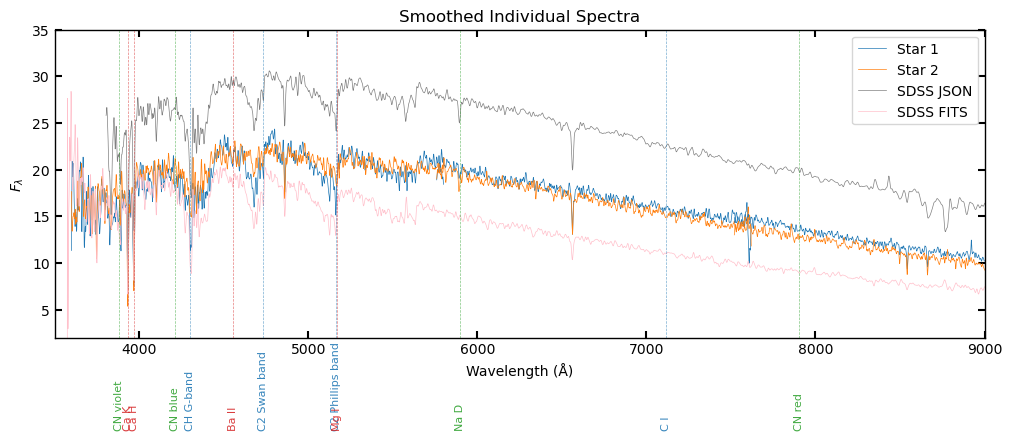

In [ ]:
#plotting the individual spectra for each star and the SDSS spectrum 
fig, ax = plt.subplots(figsize=(12, 4))

#iterating over the spectral ranges for each star
#convolving the flux data with the Gaussian kernel for smoothing
#using np.where to replace zero flux values with NaN to avoid issues with convolution
#plotting the smoothed flux data for each star in different colors 
for wav_range in ['b', 'r', 'z']:
    spp = spec1[0]
    spp2 = spec2[0]
    flux1 = convolve(np.where(spp[f"{wav_range}_flux"] == 0, np.nan, spp[f"{wav_range}_flux"]), kernel, boundary='extend')
    flux2 = convolve(np.where(spp2[f"{wav_range}_flux"] == 0, np.nan, spp2[f"{wav_range}_flux"]), kernel, boundary='extend')
    ax.plot(spp[f"{wav_range}_wavelength"], flux1, lw=0.5, color='C0', label='Star 1' if wav_range == 'b' else "")
    ax.plot(spp2[f"{wav_range}_wavelength"], flux2, lw=0.5, color='C1', label='Star 2' if wav_range == 'b' else "")

#plotting the smoothed SDSS spectrum and the BOSS FITS spectrum
ax.plot(sdss_wave, smoothed_sdss, lw=0.5, color='gray', label='SDSS JSON')
ax.plot(sdss_fits_wave, sdss_fits_flux, lw=0.5, color='pink', label='SDSS FITS')

#setting the x and y limits for the plot 
ax.set_xlim(3500, 9000)
ax.set_ylim(2, 35)
ax.set_xlabel("Wavelength (Å)")
ax.set_ylabel(r"$F_\lambda$")
ax.legend()
plt.title("Smoothed Individual Spectra")
#overlaying spectral features on the plot
overlay_features(ax)
plt.show()


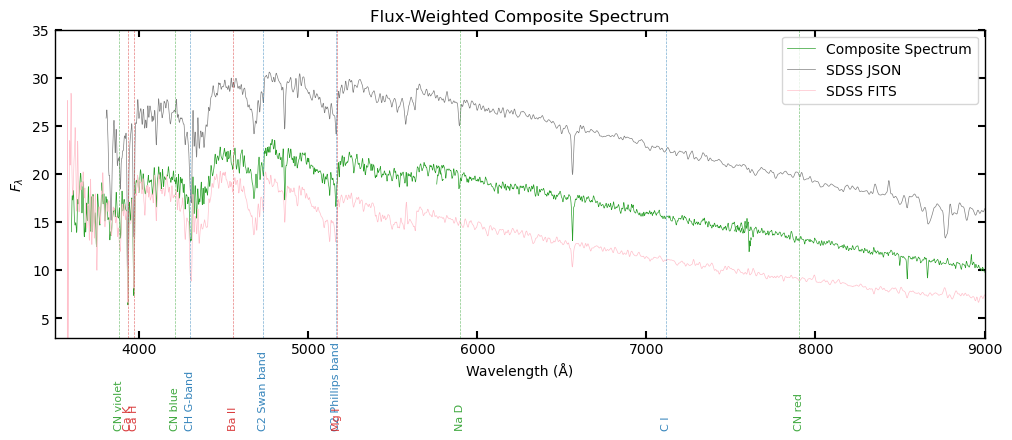

In [281]:
#plotting the flux-weighted composite spectrum from the two stars
#using the relative weights to combine the fluxes from both stars 
fig, ax = plt.subplots(figsize=(12, 4))

#convolving the flux data with the Gaussian kernel for smoothing
#using np.where to replace zero flux values with NaN to avoid issues with convolution
#combining the fluxes from both stars using the relative weights
#plotting the combined flux for each spectral range in a different color
#using the same wavelength ranges as before 
for wav_range in ['b', 'r', 'z']:
    spp = spec1[0]
    spp2 = spec2[0]
    flux1 = convolve(spp[f"{wav_range}_flux"], kernel, boundary='extend')
    flux2 = convolve(spp2[f"{wav_range}_flux"], kernel, boundary='extend')
    combo = flux1 * rel_weights[0] + flux2 * rel_weights[1]
    ax.plot(spp[f"{wav_range}_wavelength"], combo, lw=0.5, color='C2', label='Composite Spectrum' if wav_range == 'b' else "")
#plotting the smoothed SDSS spectrum and the BOSS FITS spectrum
#using the same smoothed data as before for comparison 
ax.plot(sdss_wave, smoothed_sdss, lw=0.5, color='gray', label='SDSS JSON')
ax.plot(sdss_fits_wave, sdss_fits_flux, lw=0.5, color='pink', label='SDSS FITS')

#setting the x and y limits for the plot
#ensuring the same limits as before for consistency
ax.set_xlim(3500, 9000)
ax.set_ylim(3, 35)
ax.set_xlabel("Wavelength (Å)")
ax.set_ylabel(r"$F_\lambda$")
ax.legend()
plt.title("Flux-Weighted Composite Spectrum")
#overlaying spectral features on the plot
overlay_features(ax) 
plt.show()


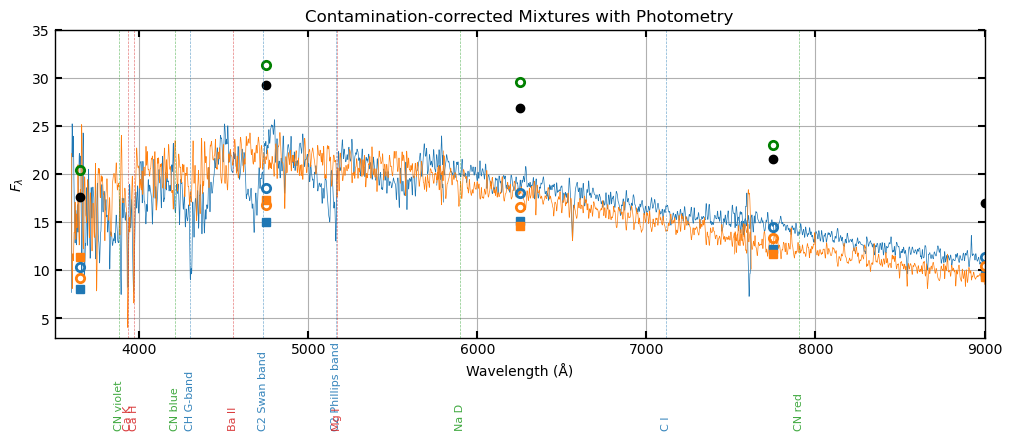

In [288]:
#plotting the contamination-corrected mixtures of the two star spectra 
#blended spectra and photometry data 
fig, ax = plt.subplots(figsize=(12, 4))

#looping over thw two mixture weights - mixtures[0] for star 1, mixtures[1] for star 2 
#mix[0] and mix[1] are the relative contributions of each star to the mixture 
#using colors 'C0' and 'C1' for the two mixtures 
for mix, color in zip(mixtures, ['C0', 'C1']):
    #looping over the spectral ranges for each mixture 
    for wav_range in ['b', 'r', 'z']:
        #selecting the spectrum for each star and convolving it with the kernel
        #spec1/spec2 = lists of desi spectra 
        #spp = spec1[0] - first star spectrum
        #spp2 = spec2[0] - second star spectrum 
        spp = spec1[0]
        spp2 = spec2[0]
        #applying a gaussian kernel to smooth the flux data 
        flux1 = convolve(spp[f"{wav_range}_flux"], kernel, boundary='extend')
        flux2 = convolve(spp2[f"{wav_range}_flux"], kernel, boundary='extend')
        #constructing blended spectrum using the mixture weights
        #linear combo of smoothed spectra from both stars 
        #using weights from mix vector 
        mixture_flux = flux1 * mix[0] + flux2 * mix[1]
        #plotting the blended spectrum for the current mixture 
        ax.plot(spp[f"{wav_range}_wavelength"], mixture_flux, lw=0.5, color=color)

#photometry data setup
#defining the bands and their corresponding wavelengths in Angstroms
#using the wavelengths dictionary defined earlier
bands = ['u', 'g', 'r', 'i', 'Z', 'Y', 'J', 'H', 'Ks']
#converting central wavelengths to Angstroms - filter centres in each band 
lambdas = np.array([wavelengths[b] * 10. for b in bands])
#converting mags to fluxes using the formula:
#fλ = 10^(-0.4 * mag) * 1.21e14 / λ^2
#where 1.21e14 is a constant to convert to erg/s/cm^2/Å
#t[b] = [magnitude for star 1, magnitude for star 2]  
flambdas = [10**(-0.4 * np.array(t[b])) * 1.21e14 / wavelengths[b]**2 for b in bands]
#transposing so flambdas[0] has all the fluxes for star 1 - same for star 2 
flambdas = np.array(flambdas).T

#plotting for star 1 and 2 
#square markers at photometric wavelengths - shows individual star fluxes in each band
ax.plot(lambdas, flambdas[0], 's', color='C0')
ax.plot(lambdas, flambdas[1], 's', color='C1')

#black circles for sum of fluxes of both stars in each band - total expected fluc
#scaling by Cc - aperture correction for sdss fibre - match observed system
ax.plot(lambdas, Cc * np.sum(flambdas, axis=0), 'ko')

#converting sdss mags to flux 
#green circles with no fill 
lambda_sdss = [wavelengths[b] * 10. for b in ['u', 'g', 'r', 'i']]
f_sdss = [10**(-0.4 * sdsst[b]) * 1.21e14 / wavelengths[b]**2 for b in ['u', 'g', 'r', 'i']]
ax.plot(λ_sdss, f_sdss, 'go', mfc='None', mew=2)

#combining star 1/2 photometric fluxes in weighted ratios - alternate mixing scenarios 
#plotting as open circles 
ax.plot(lambdas, np.sum(np.array([1., 0.2])[:, None] * flambdas, axis=0), 'o', color='C0', mfc='None', mew=2)
ax.plot(lambdas, np.sum(np.array([1., 0.1])[:, None] * flambdas, axis=0), 'o', color='C1', mfc='None', mew=2)

#setting axis labels and ranges 
ax.set_xlim(3500, 9000)
ax.set_ylim(3, 35)
ax.set_xlabel("Wavelength (Å)")
ax.set_ylabel(r"$F_\lambda$")
ax.grid()
plt.title("Contamination-corrected Mixtures with Photometry")
overlay_features(ax)
plt.show()


In [286]:
#squares = photometric fluxes from each star individually 
#black circles = combined photometric flux - with aperture corrections
#green circles = observed sdss photometry
#open circles = synthetic mixtures with manual weights